In [8]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import frgtools.plotting as frgplt

In [2]:
with open('IR Camera.pkl', 'rb') as f:
    d = pickle.load(f)

In [52]:
ims = np.asarray(d['images'])

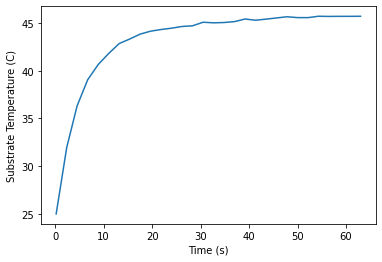

In [57]:
plt.plot(d['times'], ims[:,80:100, 25:45].mean(axis=(1,2)))
plt.xlabel("Time (s)")
plt.ylabel("Substrate Temperature (C)")
plt.savefig("Extracted Temperature Trace", dpi=300, bbox_inches='tight')

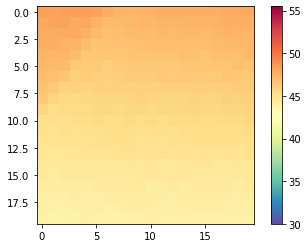

In [49]:
plt.imshow(d['images'][-1][80:100,25:45], cmap=plt.cm.Spectral_r, vmin=30, vmax=55.5)

plt.colorbar()

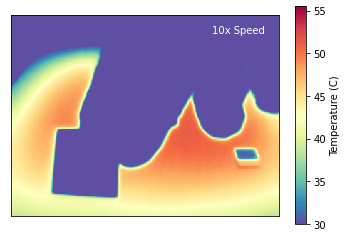

In [41]:
fig, ax = plt.subplots()
im = ax.imshow(d['images'][0], vmin=30, vmax=55.5, cmap=plt.cm.Spectral_r)
plt.colorbar(im, ax=ax, label = 'Temperature (C)')
frgplt.cornertext('10x Speed', color='w')
ax.set_xticks([])
ax.set_yticks([])
def init():
#     im.set_data
    return ax,im
def animate(i):
    ax.set_title(f"{d['times'][i]:.2f} Seconds")
    im.set_data(d['images'][i])
#     frgplt.cornertext(f"{d['times'][i]:.2f} s")
    return ax,im 

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=200, blit=False, repeat_delay=1000, repeat=True)


In [42]:
HTML(anim.to_html5_video())

In [43]:
anim.save("Temperature Tracking Video.gif", dpi=150)